In [1]:
from google.colab import files
upload = files.upload()

Saving US_Regressor_sample.csv to US_Regressor_sample.csv


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import tensorflow as tf
import joblib
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = 'US_Regressor_sample.csv'
df = pd.read_csv(file_path)
df.reset_index(inplace=True, drop=True)
df=df.drop(columns='channel_text')
df.head()

,category_id,views,comments_disabled,ratings_disabled,difference_d,difference_h,published_year,published_month,trending_year,trending_month
0,10,35374613,"""False""","""False""",10.0,243.0,2017,12,2017,12
1,22,502185,"""False""","""False""",3.0,88.0,2017,12,2017,12
2,10,1006123,"""False""","""False""",2.0,51.0,2018,5,2018,5
3,23,891181,"""False""","""False""",1.0,45.0,2018,3,2018,3
4,25,85244,"""False""","""False""",8.0,200.0,2018,2,2018,3


In [4]:
#Change comments_disabled from True/False to 1/0
def change_string(comments_disabled):
  if comments_disabled == "True":
    return 1
  else:
    return 0

df['comments_disabled'] = df['comments_disabled'].apply(change_string)
df.head()

,category_id,views,comments_disabled,ratings_disabled,difference_d,difference_h,published_year,published_month,trending_year,trending_month
0,10,35374613,0,"""False""",10.0,243.0,2017,12,2017,12
1,22,502185,0,"""False""",3.0,88.0,2017,12,2017,12
2,10,1006123,0,"""False""",2.0,51.0,2018,5,2018,5
3,23,891181,0,"""False""",1.0,45.0,2018,3,2018,3
4,25,85244,0,"""False""",8.0,200.0,2018,2,2018,3


In [5]:
#Change ratings_disabled from True/False to 1/0
def change_strings(ratings_disabled):
  if ratings_disabled == "True":
    return 1
  else:
    return 0

df['ratings_disabled'] = df['ratings_disabled'].apply(change_string)
df.head()

,category_id,views,comments_disabled,ratings_disabled,difference_d,difference_h,published_year,published_month,trending_year,trending_month
0,10,35374613,0,0,10.0,243.0,2017,12,2017,12
1,22,502185,0,0,3.0,88.0,2017,12,2017,12
2,10,1006123,0,0,2.0,51.0,2018,5,2018,5
3,23,891181,0,0,1.0,45.0,2018,3,2018,3
4,25,85244,0,0,8.0,200.0,2018,2,2018,3


In [6]:
# #create the features
X = df.drop(columns=['difference_h', 'difference_d','views'])

#create the target
y= df['difference_h']

R-squared: 0.8057326152248774
MSE:  11086.896270744894
RMSE:  5543.448135372447


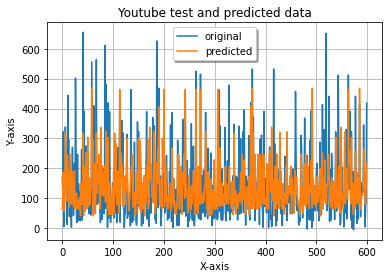

In [9]:
#Test train and split the data for use in BRFR
# X= scale(X)
# y= scale(y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)
rfr = RandomForestRegressor()
pipe= Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

pipe.fit(Xtrain, ytrain)

score = pipe.score(Xtrain, ytrain)
print("R-squared:", score)

ypred = pipe.predict(Xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Youtube test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [13]:
# save
filename = 'Hours_trending_US.sav'
pickle.dump(pipe, open(filename, 'wb'))

In [14]:
from google.colab import files
files.download("Hours_trending_US.sav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
Xtest

,category_id,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month
997,10,0,0,2017,11,2017,12
404,24,0,0,2018,5,2018,6
256,10,0,0,2018,1,2018,1
39,17,0,0,2017,12,2017,12
480,26,0,0,2018,3,2018,3
...,...,...,...,...,...,...,...
669,27,0,0,2017,11,2017,11
399,24,0,0,2018,1,2018,1
1111,22,0,0,2018,1,2018,1
414,22,0,0,2018,3,2018,3


In [70]:
#Testing
pipe.predict([[10,0,0,2017,5,2017,6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([648.6053454])